<a href="https://colab.research.google.com/github/vvtrip/pyspark_course/blob/master/6%20-%20Case_Study_I_Perform_Querying_Operations_on_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Test the spark environment by executing the spark’s HdfsTest.scala example.

2. Try to implement the same example in pyspark and perform spark-submit.

3. Analyzethe behavior of spark application on Spark web UI

4. Edit the application and add custom logs. Once executed check the Spark logs.

5. Transfer the sample dataset from RDBMS to HDFS

6. Validate the loaded data by comparing the statistics of data both in source and HDFS

7. Create a new directory EQ in HDFS and transfer the data where series is EQ

8. Set total trades which are less than 500 to 0 and transfer only updated rows.

# 1

following is Hdfstest.scala

In [ ]:
/*
 * Licensed to the Apache Software Foundation (ASF) under one or more
 * contributor license agreements.  See the NOTICE file distributed with
 * this work for additional information regarding copyright ownership.
 * The ASF licenses this file to You under the Apache License, Version 2.0
 * (the "License"); you may not use this file except in compliance with
 * the License.  You may obtain a copy of the License at
 *
 *    http://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 * See the License for the specific language governing permissions and
 * limitations under the License.
 */

// scalastyle:off println
package org.apache.spark.examples

import java.util.concurrent.TimeUnit

import org.apache.spark.sql.SparkSession


object HdfsTest {

  /** Usage: HdfsTest [file] */
  def main(args: Array[String]): Unit = {
    if (args.length < 1) {
      System.err.println("Usage: HdfsTest <file>")
      System.exit(1)
    }
    val spark = SparkSession
      .builder
      .appName("HdfsTest")
      .getOrCreate()
    val file = spark.read.text(args(0)).rdd
    val mapped = file.map(s => s.length).cache()
    for (iter <- 1 to 10) {
      val startTimeNs = System.nanoTime()
      for (x <- mapped) { x + 2 }
      val durationMs = TimeUnit.NANOSECONDS.toMillis(System.nanoTime() - startTimeNs)
      println(s"Iteration $iter took $durationMs ms")
    }
    println(s"File contents: ${file.map(_.toString).take(1).mkString(",").slice(0, 10)}")
    println(s"Returned length(s) of: ${file.map(_.length).sum().toString}")
    spark.stop()
  }
}
// scalastyle:on println

following is sample text file named tfile.txt

empno,ename,designation,manager,hire_date,sal,deptno

7369,SMITH,CLERK,7902,12/17/1980,800,20

7499,ALLEN,SALESMAN,7698,2/20/1981,1600,30

7521,WARD,SALESMAN,7698,2/22/1981,1250,30

7566,TURNER,MANAGER,7839,4/2/1981,2975,20

7654,MARTIN,SALESMAN,7698,9/28/1981,1250,30

7698,MILLER,MANAGER,7839,5/1/1981,2850,30

7782,CLARK,MANAGER,7839,6/9/1981,2450,10

7788,SCOTT,ANALYST,7566,12/9/1982,3000,20

7839,KING,PRESIDENT,NULL,11/17/1981,5000,10

7844,TURNER,SALESMAN,7698,9/8/1981,1500,30

7876,ADAMS,CLERK,7788,1/12/1983,1100,20

7900,JAMES,CLERK,7698,12/3/1981,950,30

7902,FORD,ANALYST,7566,12/3/1981,3000,20



steps to execute:

txt file should be present in hdfs

scala file should be present in local fs

open spark shell using command
  > spark-shell

then load the scala file using following command
  > :load /path_to_scala_file/HdfsTest.scala

then provide txt input(hdfs path) under main method of scala file as
  > HdfsTest.main(Array('/user/user_name/tfile.txt'))



OUTPUT RETURNED IS

Iteration 1 took 9471 ms

Iteration 2 took 289 ms

Iteration 3 took 159 ms

Iteration 4 took 122 ms

Iteration 5 took 93 ms

Iteration 6 took 84 ms

Iteration 7 took 62 ms

Iteration 8 took 86 ms

Iteration 9 took 77 ms

Iteration 10 took 53 ms

File contents: [empno,ena

Returned length(s) of: 27.0

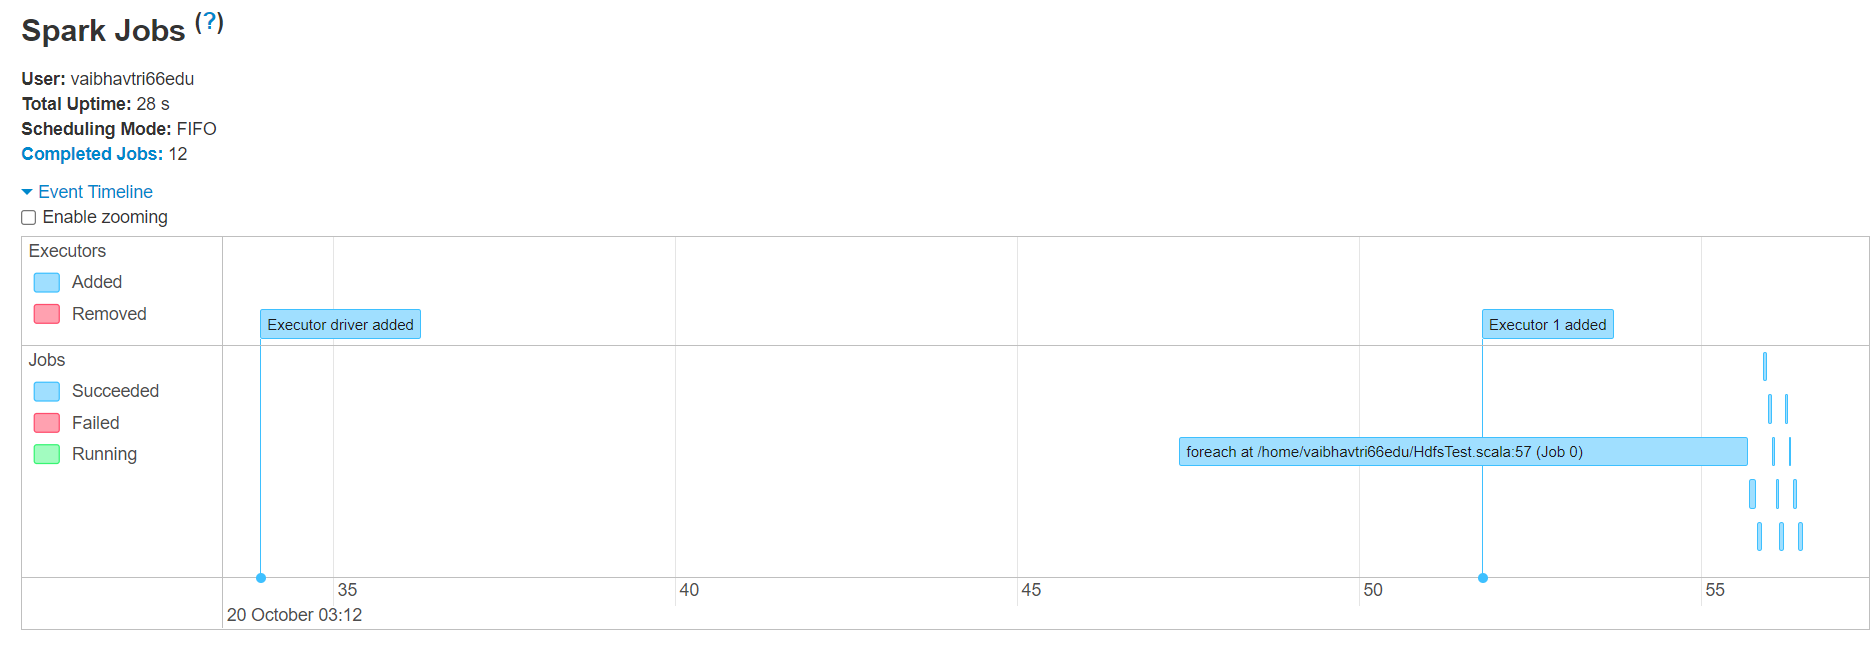

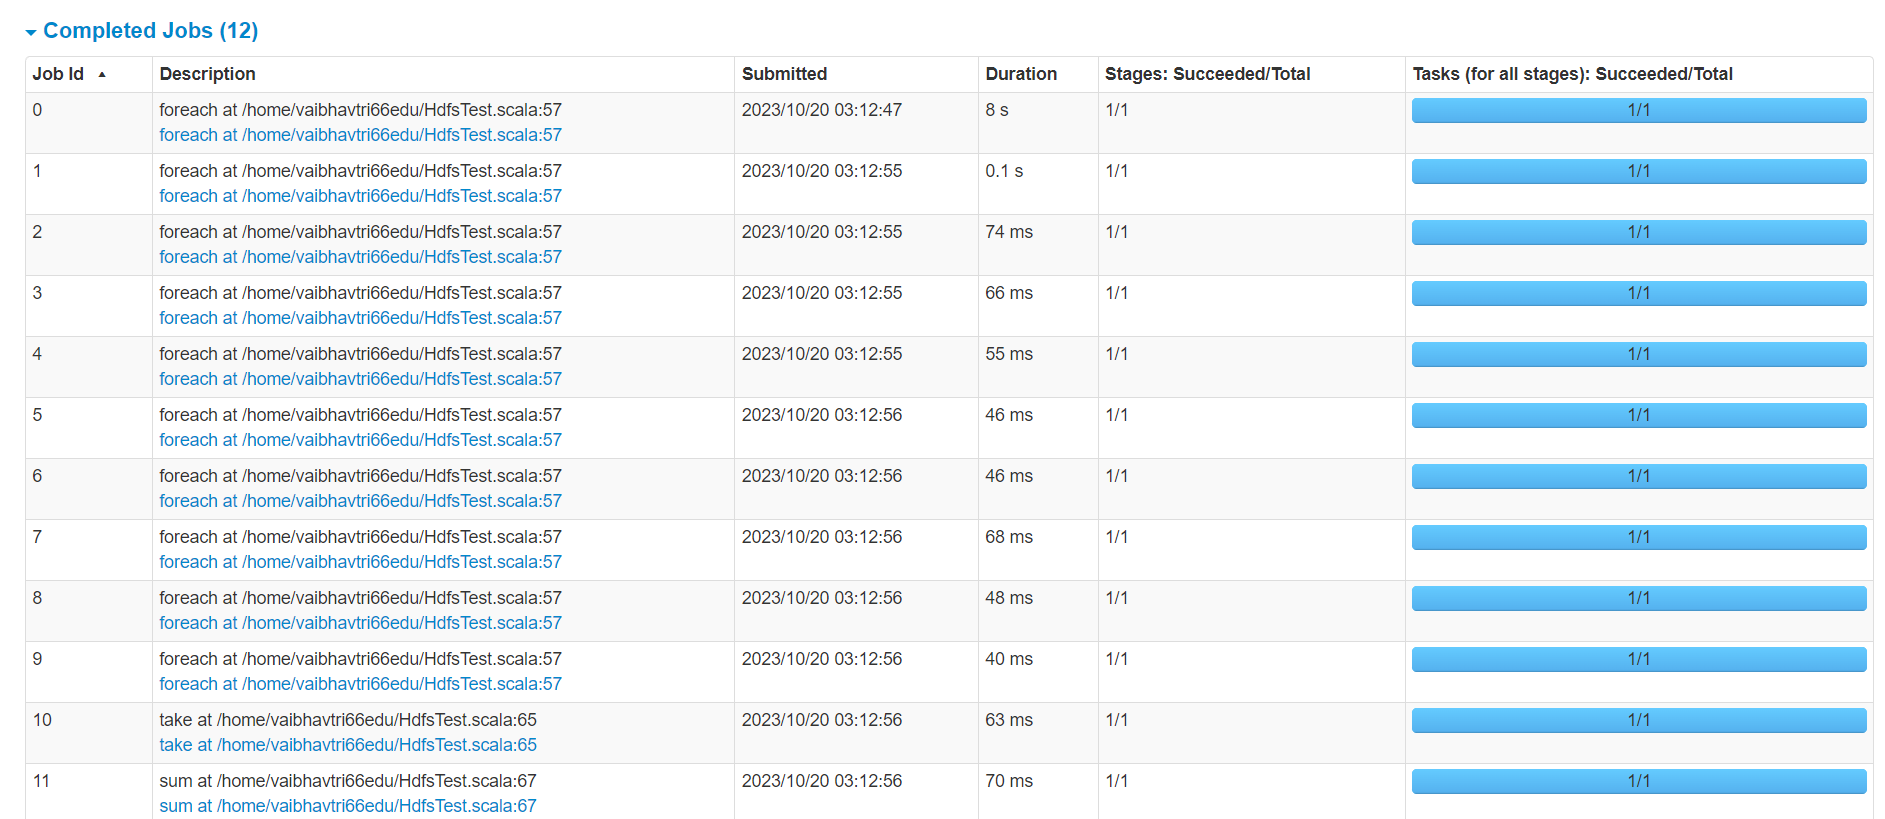

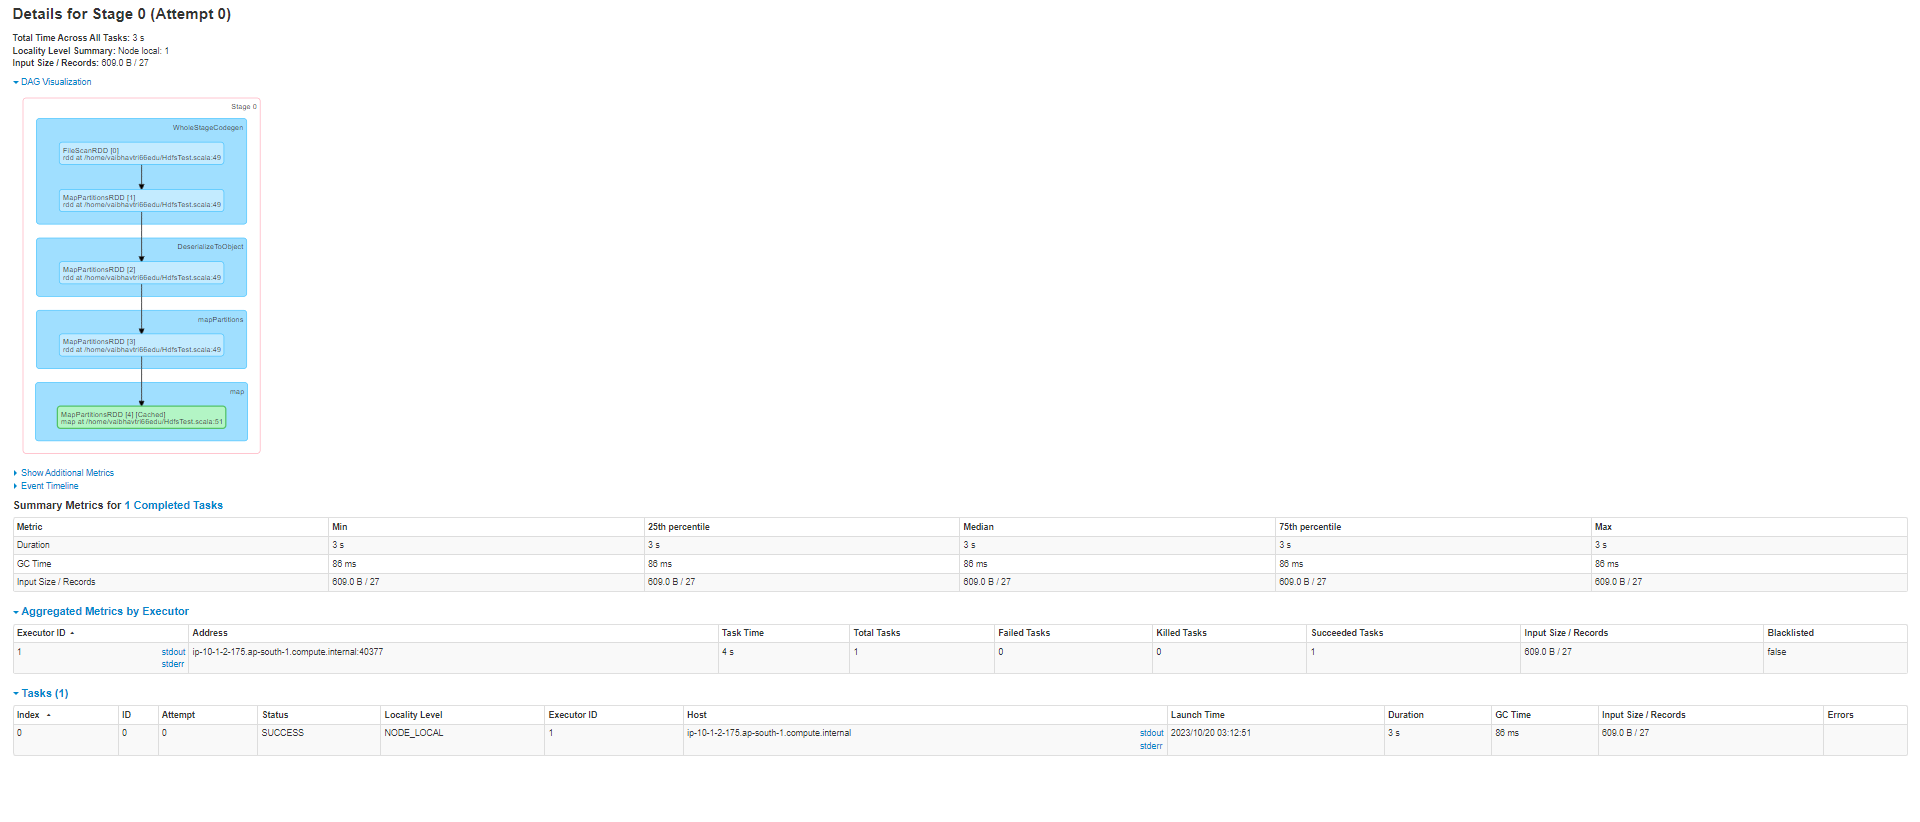

# 2

following is the python file named sort.py for pyspark job using spark-submit

In [ ]:
from __future__ import print_function
import sys,time
from pyspark.sql import SparkSession
if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: hdfstest.py <file>", file=sys.stderr)
        exit(-1)
    spark = SparkSession\
        .builder\
        .appName("HdfsTest_py")\
        .getOrCreate()
    file_ = spark.read.text(sys.argv[1]).rdd
    mapped = file_.map(lambda s:len(s)).cache()
    for i in range(10):
        start_time = time.time()
        mapped.map(lambda x: x+2)
        end_time = time.time()
        print('----> Iteration took:', end_time - start_time,'ms')
    spark.stop()


submitting pyspark job in local fs (Also has tfile.txt)
  > spark-submit sort.py tfiletxt

with following snippet from output

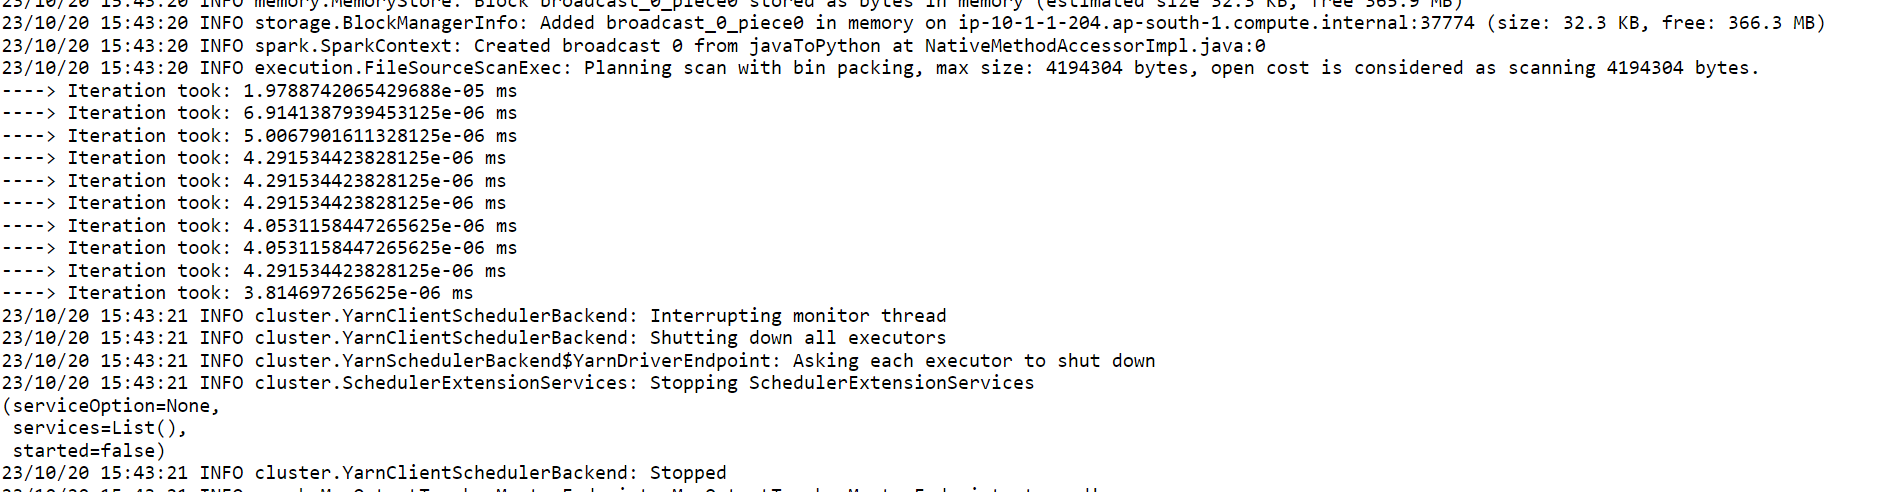

logged inot mysql using
  > mysql -u username -p database

then created schema using following query
  > create table financial_regulation (SYMBOL varchar(100),SERIES varchar(50),OPEN double,HIGH double, LOW double,CLOSE double,LAST double,PREVCLOSE double, TOTTRDQTY double,TOTTRDVAL double,TIMESTAMP date,TOTALTRADES int,ISIN varchar(50));


loading data from csv in the table
  >load data local infile '/home/username/FINAL_FROM_DF.csv' into table financial_regulation;

listed tables
  >sqoop list-databases --connect jdbc:mysql://sqoopdb.edu.cloudlab.com/userdb --username labuser --password edureka

transfer data
  >sqoop import --connect jdbc:mysql://sqoopdb.edu.cloudlab.com/use_cases --username labuser -password edureka --table financial_regulation -m 1 --target-dir /user/hadoop_username/use_cases/fr/    

Check files in HDFS using recursive list
  >hdfs dfs -ls -R /user/hadoop_username/use_cases/

Count the lines
  >hdfs dfs -cat /user/hadoop_username/use_cases/fr/*|wc -l

Match first 5 rows:
  >hdfs dfs -cat /user/hadoop_username/use_cases/fr/*|head -5

Create a new directory EQ in HDFS and transfer the data where series is EQ
  >hdfs dfs -mkdir /user/hadoop_username/use_cases/fr/eq
sqoop import --connect jdbc:mysql://sqoopdb.edu.cloudlab.com/use_cases --username labuser --password edureka --table financial_regulation --where "SERIES='EQ'" -m 1 --target-dir /user/hadoop_username7/use_cases/fr/eq/

Set total trades which are less than 500 to 0 and and transfer only updated rows.

Add new column updated in mysql
  >alter table financial_regulation add updated bit;

Update table
  >update financial_regulation set updated=0 where TRADES<500;

Transfer data
  >sqoop import --connect jdbc:mysql://sqoopdb.edu.cloudlab.com/use_cases --username labuser --password edureka --table financial_regulation --incremental append --check-column 'updated' --where "SERIES='EQ'" -m 1 --target-dir /user/hadoop_username/use_cases/fr/eq/  